In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Cài đặt & import thư viện

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Cấu hình chung cho seaborn và matplotlib
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## 2. Đọc dữ liệu

In [3]:
file_path = '/content/drive/MyDrive/Project_DA_TIMA/Data/Tima_CRM_Handled_Python.csv'
df = pd.read_csv(file_path, keep_default_na=False, na_values=[])

df.head()

,STT,application_date,TS_CREDIT_SCORE_V2,SoDienThoai,FromDate,ID,LoanID,SoTienDKVayBanDau,TienGiaiNgan,TienGocConLai,...,CheckTime,Brieft,NumberOfLoans,HasBadDebt,HasLatePayment,TS_CREDIT_SCORE_V2_scaled,Salary_scaled,LongestOverdue_scaled,CustomerAge,LoanDuration
0,6.0,2016-08-05,675.0,966710180,2016-08-05,293.0,22390.0,10000000.0,10000000.0,0.0,...,2019-03-17 14:14:22,0,0.0,0.0,0.0,0.858523,0.281499,1.459592,34.0,119
1,7.0,2016-06-29,675.0,966710180,2016-06-29,66.0,17084.0,10000000.0,10000000.0,10000000.0,...,2019-03-17 14:14:22,0,0.0,0.0,0.0,0.858523,0.281499,-0.691917,34.0,29
2,8.0,2016-07-07,582.0,963609962,2016-07-07,102.0,17984.0,7000000.0,7000000.0,4000000.0,...,2019-03-17 12:21:17,0,0.0,0.0,0.0,-0.191973,-0.190289,1.152234,28.0,239
3,9.0,2018-05-31,522.0,967387461,2018-05-31,224656.0,52603.0,4000000.0,4000000.0,4000000.0,...,2019-03-17 11:42:35,2,2.0,0.0,0.0,-0.869713,-0.190289,-0.384558,27.0,89
4,10.0,2018-08-01,483.0,967387461,2018-08-01,247245.0,53389.0,10000000.0,10000000.0,10000000.0,...,2019-03-17 11:42:35,2,2.0,0.0,0.0,-1.310243,-0.190289,0.537517,27.0,224


## 3. Phân phối biến liên tục (Histogram + KDE)

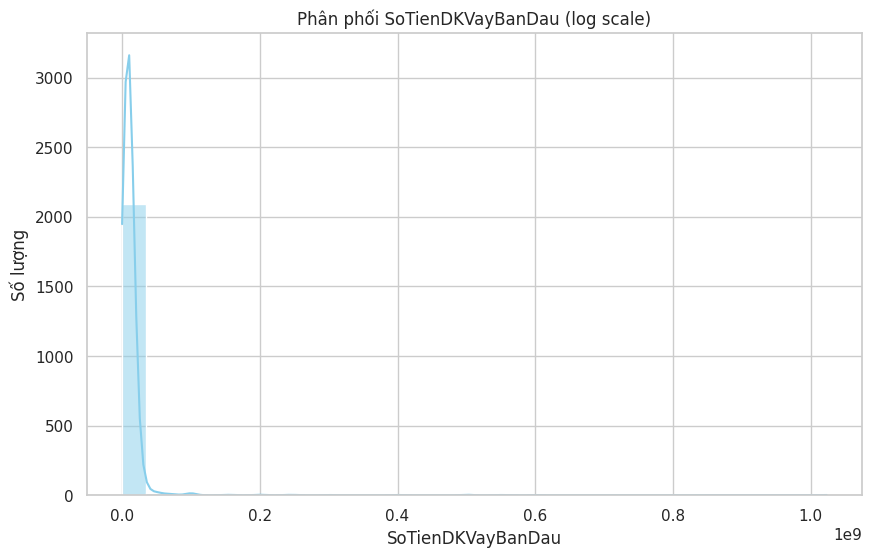

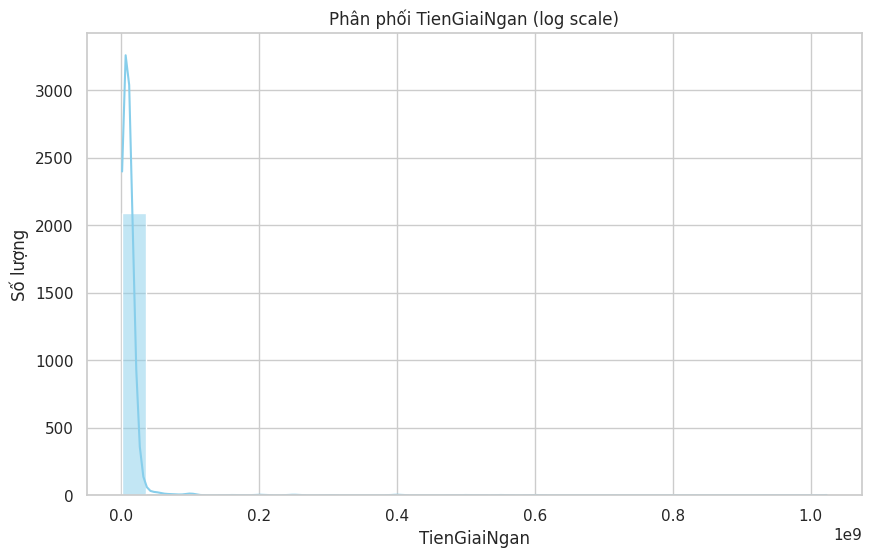

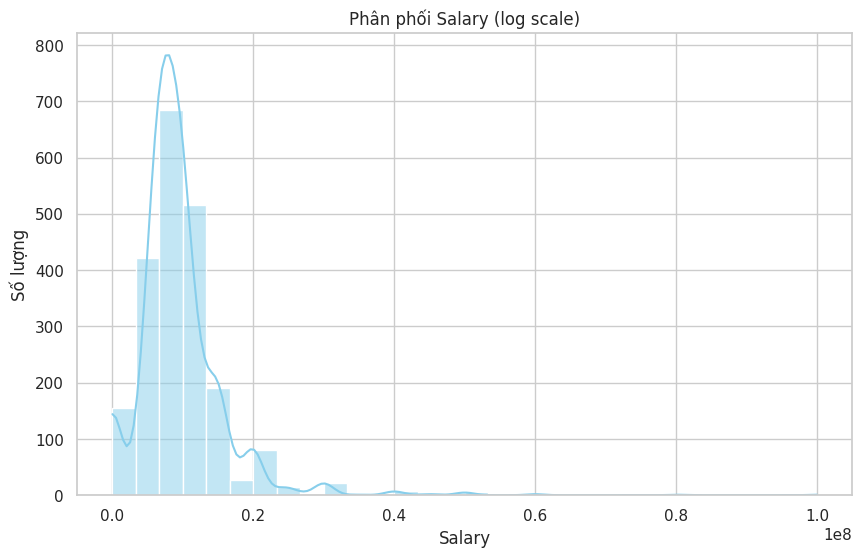

In [4]:
cols = ['SoTienDKVayBanDau', 'TienGiaiNgan', 'Salary']
for col in cols:
    if col in df.columns:
        sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
        # plt.xscale('log')  # log scale để nhìn rõ hơn
        plt.title(f"Phân phối {col} (log scale)")
        plt.xlabel(col)
        plt.ylabel("Số lượng")
        plt.show()


### 3.1. Nhận xét

1. SoTienDKVayBanDau
Đỉnh lớn tại ~10^7 (~10 triệu) → nhiều khách đăng ký vay ở mức này, có thể do đây là gói vay phổ biến.

Một số cụm nhỏ hơn ở khoảng 10^6 (~1 triệu) và 10^5 (~100 nghìn).

Phân phối lệch phải, nhưng log scale giúp thấy rõ các nhóm giá trị.

2. TienGiaiNgan
Cũng có một đỉnh rõ ràng ở ~10^7 (~10 triệu), khá tương đồng với SoTienDKVayBanDau.

Ngoài ra, có nhiều nhóm nhỏ ở khoảng 2–5 triệu, cho thấy không phải tất cả khoản giải ngân đều trùng hoàn toàn với số tiền đăng ký.

Điều này có thể phản ánh việc duyệt khoản vay thấp hơn số đăng ký.

3. Salary
Phân phối Salary cũng lệch phải nhưng không cực đoan bằng 2 cột trên.

Đỉnh lớn nhất ở khoảng 5–10 triệu → đây có thể là mức lương phổ biến của khách hàng.

Có một số khách hàng có lương rất cao (~10^8), nhưng số lượng rất ít (outlier).

## 4. Boxplot phát hiện ngoại lai

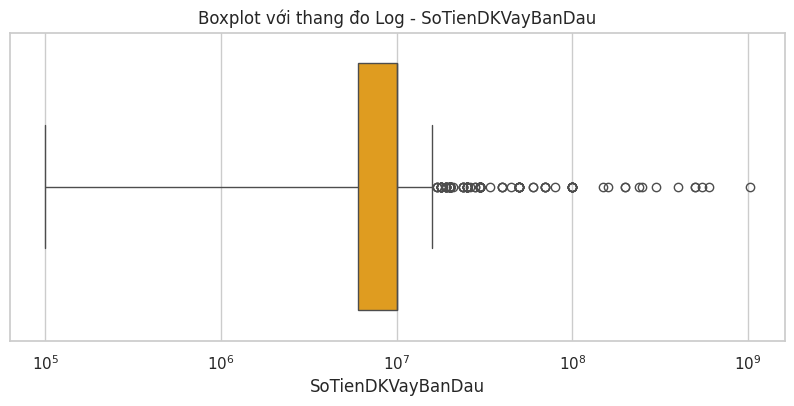

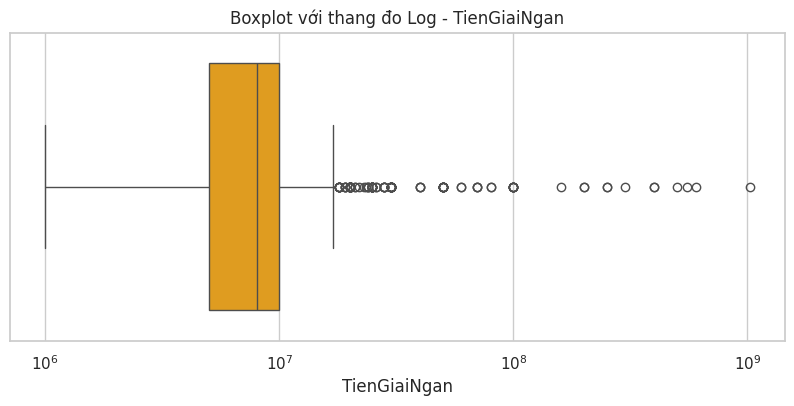

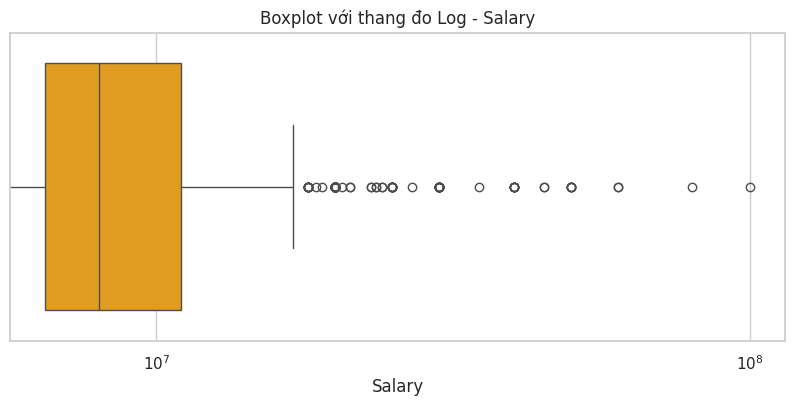

In [5]:
cols = ['SoTienDKVayBanDau', 'TienGiaiNgan', 'Salary']
for col in cols:
    plt.figure(figsize=(10, 4)) # Tùy chỉnh kích thước cho dễ nhìn hơn
    sns.boxplot(x=df[col], color='orange')
    plt.xscale('log') # Áp dụng thang đo logarit cho trục x
    plt.title(f"Boxplot với thang đo Log - {col}")
    plt.show()

### 4.1. Nhận Xét
1. Đối với "SoTienDKVayBanDau" và "TienGiaiNgan":
* Phân phối của hai biến này trông rất giống nhau.
* Giá trị trung vị (median) của các khoản vay rơi vào khoảng 10^7 (tức 10 triệu).
* 50% các khoản vay tập trung trong khoảng từ ~5x10^6 đến 1.5x10^7 (khoảng từ 5 triệu đến 15 triệu).
* Dữ liệu bị lệch phải (right-skewed) rất mạnh, thể hiện qua việc có nhiều outliers với giá trị rất lớn, lên tới 10^9 (1 tỷ).

2. Đối với "Salary":
* Mức lương trung vị cũng nằm ở khoảng 10^7 (10 triệu).
* Phân phối của mức lương có vẻ rộng hơn một chút so với dữ liệu khoản vay. 50% dữ liệu lương nằm trong khoảng từ ~6x10^6 đến 1.5x10^7 (6 triệu đến 15 triệu).
* Dữ liệu lương cũng bị lệch phải, cho thấy có một số ít người có mức lương cao hơn đáng kể so với mặt bằng chung.

### 4.2. Bỏ giá trị ngoại lại bằng IQR

In [6]:
k = 3
for col in cols:
    if col in df.columns:
        # Loại bỏ outlier theo IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[col] >= Q1 - k*IQR) & (df[col] <= Q3 + k*IQR)]

## 5. Scatter Plot – Mối quan hệ giữa 2 biến

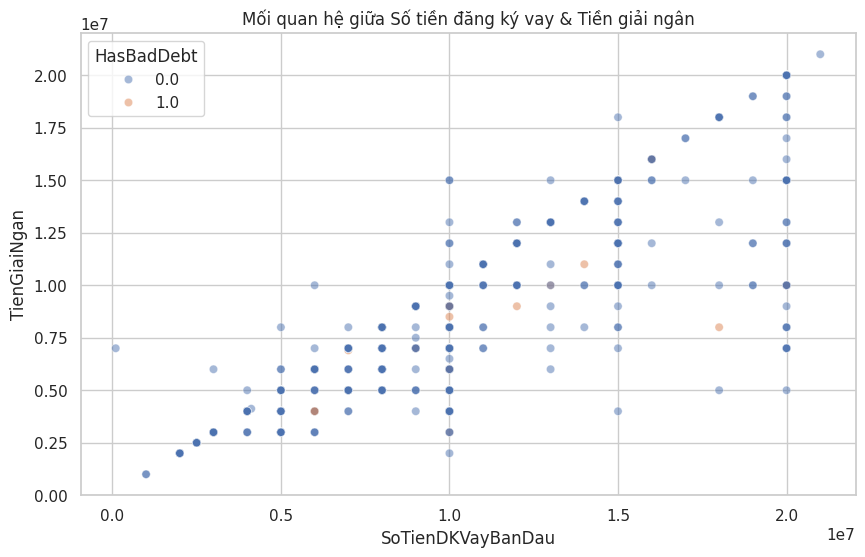

In [7]:
sns.scatterplot(data=df, x='SoTienDKVayBanDau', y='TienGiaiNgan', hue='HasBadDebt', alpha=0.5)
plt.title("Mối quan hệ giữa Số tiền đăng ký vay & Tiền giải ngân")
plt.show()


## 6. Heatmap – Ma trận tương quan

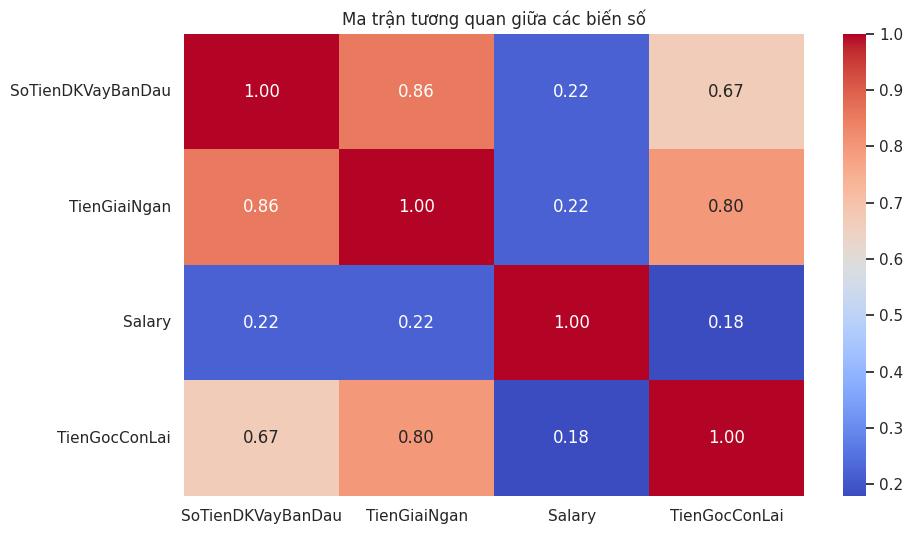

In [8]:
# Lấy các biến số liên tục
num_cols = ['SoTienDKVayBanDau', 'TienGiaiNgan', 'Salary', 'TienGocConLai']
corr = df[num_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Ma trận tương quan giữa các biến số")
plt.show()


##  7. Countplot – Biến phân loại

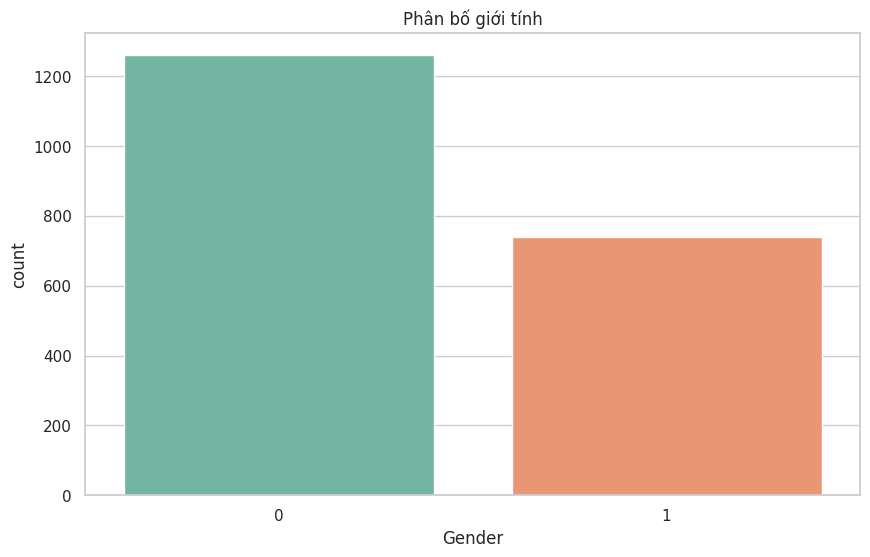

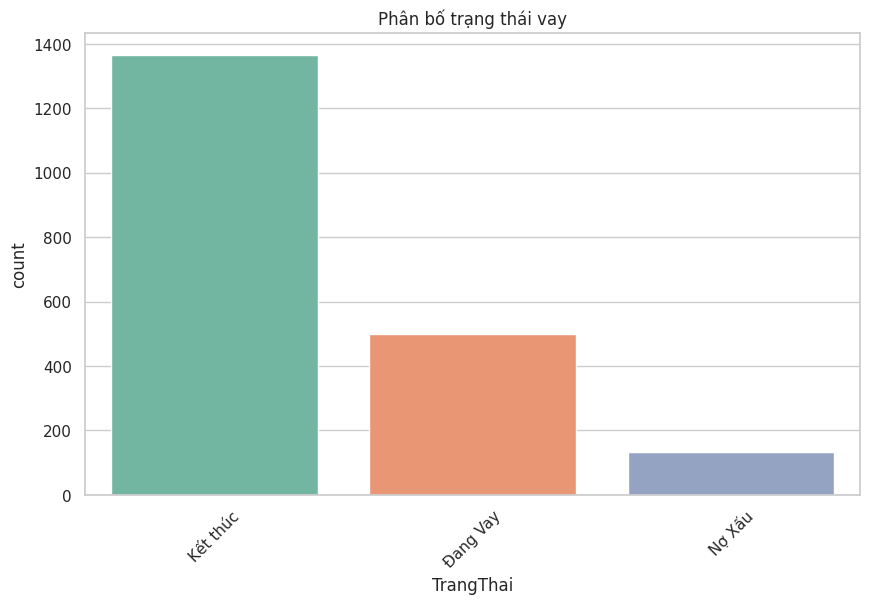

In [9]:
# Phân bố giới tính
sns.countplot(data=df, x='Gender', hue='Gender', palette='Set2', legend=False)
plt.title("Phân bố giới tính")
plt.show()

# Phân bố trạng thái vay
sns.countplot(data=df, x='TrangThai', hue='TrangThai', palette='Set2', legend=False)
plt.title("Phân bố trạng thái vay")
plt.xticks(rotation=45)
plt.show()


## 8. Violin plot – So sánh phân phối giữa nhóm

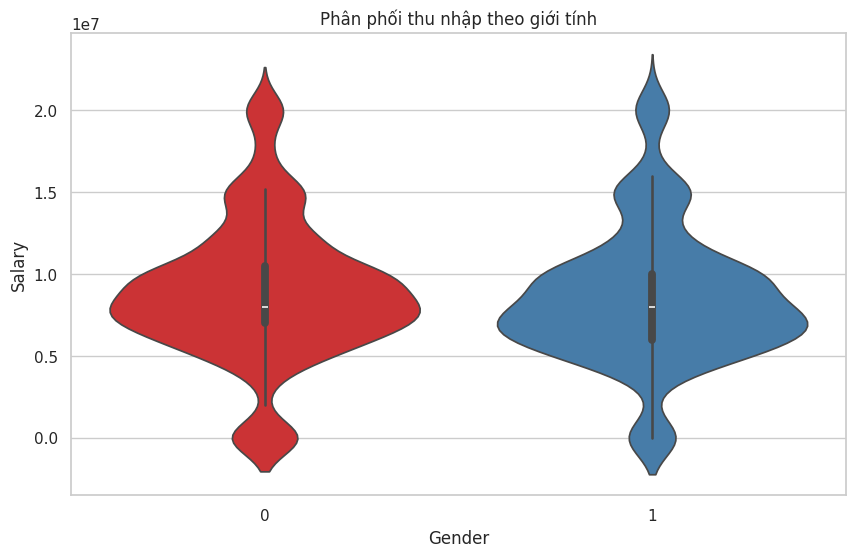

In [10]:
sns.violinplot(data=df, x='Gender', y='Salary', hue='Gender', palette='Set1', legend=False)
plt.title("Phân phối thu nhập theo giới tính")
plt.show()


## 9. Pairplot – Quan hệ nhiều biến

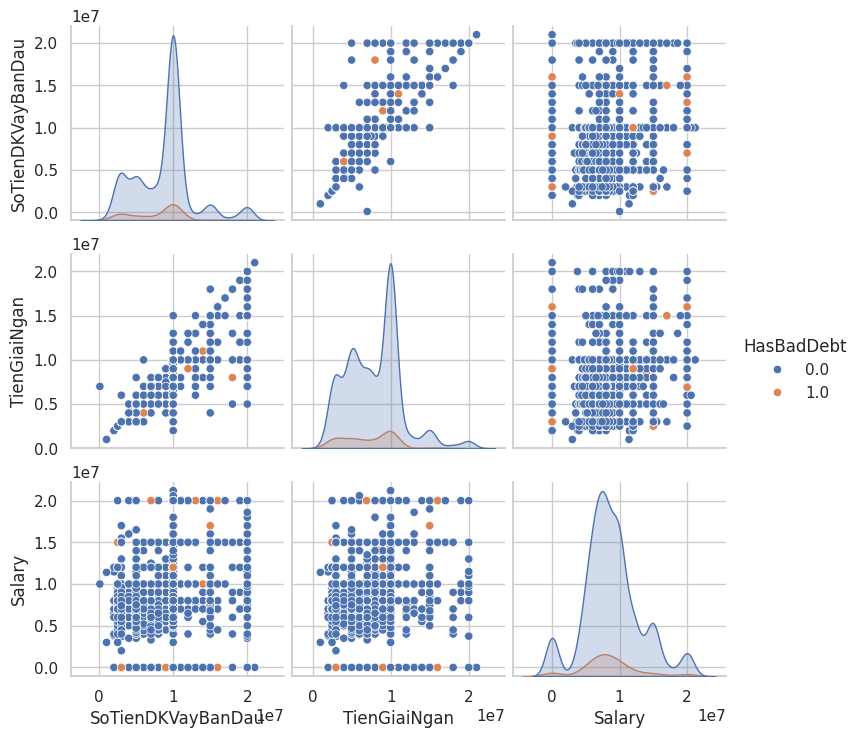

In [11]:
sns.pairplot(df, vars=['SoTienDKVayBanDau', 'TienGiaiNgan', 'Salary'], hue='HasBadDebt')

## 10. Bubble Chart (Plotly)

In [12]:
fig = px.scatter(df, x='SoTienDKVayBanDau', y='TienGiaiNgan',
                 size='Salary', color='HasBadDebt',
                 hover_data=['CardNumber', 'CityName'],
                 title='Bubble Chart: Số tiền vay, giải ngân và thu nhập')
fig.show()


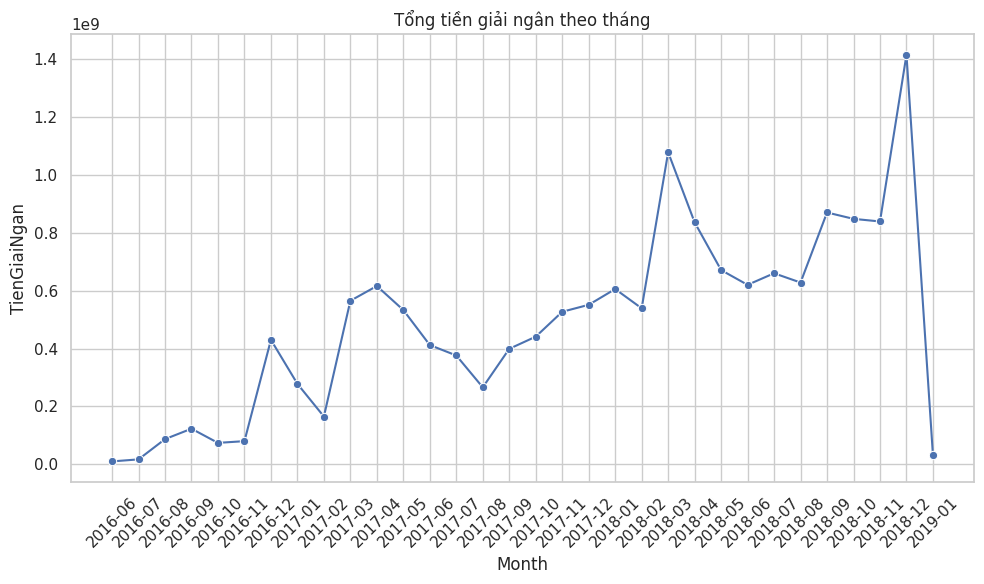

In [13]:
df['FromDate'] = pd.to_datetime(df['FromDate'], errors='coerce')
# Group theo tháng
df_monthly = (
    df.groupby(df['FromDate'].dt.to_period('M'))['TienGiaiNgan']
      .sum()
      .reset_index()
      .rename(columns={'FromDate': 'Month'})
)

# Đổi kiểu Period -> string
df_monthly['Month'] = df_monthly['Month'].astype(str)

# Vẽ line chart
sns.lineplot(data=df_monthly, x='Month', y='TienGiaiNgan', marker='o')
plt.title("Tổng tiền giải ngân theo tháng")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Lưu lại dữ liệu

In [14]:
df.dropna(inplace=True)
df.to_csv('/content/drive/MyDrive/Project DA/Data/Tima_CRM_Handled_Python.csv', index=False, encoding='utf-8-sig')

OSError: Cannot save file into a non-existent directory: '/content/drive/MyDrive/Project DA/Data'

In [ ]:
df.shape